# This notebook shows how to run the hard-coded 2-step QPS circuits, from QuantumPartonShower_ReM_2step_hardcode.py

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
sys.path.append('../qiskit_legacy')
sys.path.append('../qiskit_code')

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import plotting_old as pl
import matplotlib

from PaperPlots import MakeObservables as mo

In [5]:
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs

## Define parameters

In [7]:
eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000
N= 2

## Create circuits

In [14]:
qps0= qps_rhs.QuantumPartonShower(N, 1) # for g12= 0
qps1= qps_rhs.QuantumPartonShower(N, 1) # for g12= 1

qc0, qubits0= qps0.createCircuit(eps, g_1, g_2, 0, initialParticles)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

Applying step 1.
Apply uE()...
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.
Applying step 1.
Apply uE()...
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.


## Simulate circuits and store results

In [19]:
print('Qubits: ' + str(qc0.num_qubits))
print('Gates: ' + str(qc0.count_ops()))

t1= time.time()
counts0= qps0.simulate('qasm', shots=shots)
t2= time.time()
counts1= qps1.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 0: ' + str(t2-t1))
print('Time to simulate withg g12= 1: ' + str(t3-t2))

Qubits: 12
Gates: OrderedDict([('x', 20), ('measure', 14), ('cu3', 8), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])

Time to simulate withg g12= 0: 0.9523138999938965
Time to simulate withg g12= 1: 1.8317639827728271


## Some diagnostic plots

0 100 101 110 101 101 af1 f2 f2 20
1 100 101 101 111 101 f2 af2 f2 38
2 100 101 100 110 101 f1 af1 f2 116
3 000 001 000 001 100 0 phi f1 144
4 100 101 111 101 100 af2 f2 f1 210
5 100 101 101 110 100 f2 af1 f1 198
6 100 101 110 100 101 af1 f1 f2 132
7 100 101 100 111 101 f1 af2 f2 37
8 100 101 101 110 101 f2 af1 f2 21
9 101 100 001 000 100 phi 0 f1 984
10 100 101 111 100 101 af2 f1 f2 30
11 100 101 100 110 100 f1 af1 f1 775
12 100 101 101 111 100 f2 af2 f1 183
13 100 101 111 101 101 af2 f2 f2 31
14 000 000 000 000 101 0 0 f2 1340
15 000 000 000 000 100 0 0 f1 1365
16 101 100 001 000 101 phi 0 f2 54
17 100 101 100 111 100 f1 af2 f1 182
18 000 001 000 001 101 0 phi f2 9
19 101 101 001 001 101 phi phi f2 805
20 100 101 110 101 100 af1 f2 f1 197
21 100 101 111 100 100 af2 f1 f1 184
22 100 101 110 100 100 af1 f1 f1 802
23 101 101 001 001 100 phi phi f1 2143


/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting_old.py:340: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


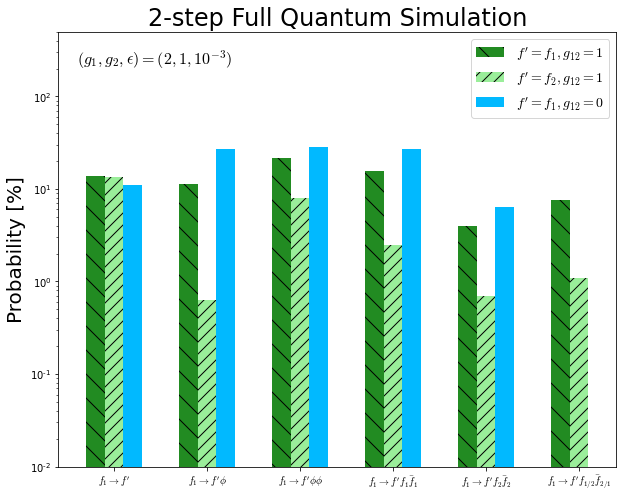

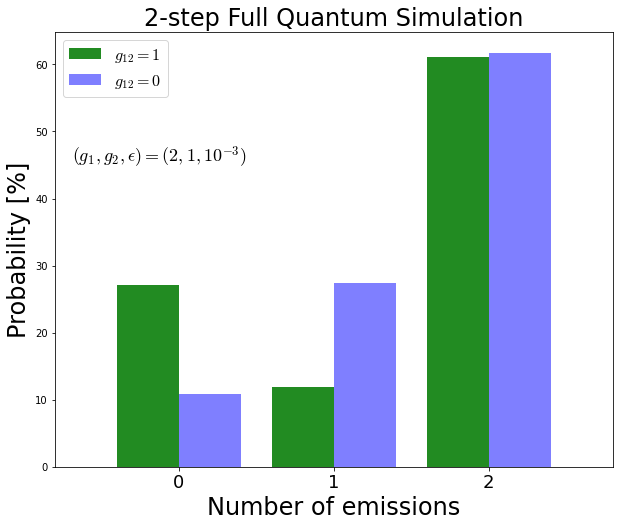

In [21]:
# Note: make sure the first counts parameters is g12=1, and the optional counts2 parameter is g12=0.

# Plot the final particle configuration
pl.bar_plot2(counts1, shots, eps, g_1, g_2, counts2= counts0, save=False, wReg=False)

# Plot the number of emissions 
pl.bar_plot_emissions(counts1, shots, eps, g_1, g_2, N, 1, counts2= counts0, save=False, wReg=False)

## Draw the circuit

In [23]:
qc0.draw()

┌───────┐┌───┐                     ┌───┐                  ┌───┐     »
    p_0: ┤ Ry(0) ├┤ X ├───────────■─────────┤ X ├────────■─────────┤ X ├─────»
         └───────┘└┬─┬┘┌─┐        │         └───┘        │         └───┘     »
    p_1: ──────────┤M├─┤M├────────┼──────────────────────┼───────────────────»
           ┌───┐   └╥┘ └╥┘        │                      │                   »
    p_2: ──┤ X ├────╫───╫─────────┼──────────────────────┼───────────────────»
           └───┘    ║   ║         │                      │                   »
    p_3: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    p_4: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    p_5: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    p_6: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    p_7: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    p_8: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    h_0: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║         │                      │                   »
    h_1: ───────────╫───╫─────────┼──────────────────────┼───────────────────»
                    ║   ║ ┌───────┴────────┐     ┌───────┴────────┐ ┌─┐      »
      e: ───────────╫───╫─┤ U3(1.9112,0,0) ├─────┤ U3(1.0247,0,0) ├─┤M├──|0>─»
                    ║   ║ └────────────────┘     └────────────────┘ └╥┘      »
p0_cl: 3/═══════════╩═══╩════════════════════════════════════════════╬═══════»
                    1   1                                            ║       »
p1_cl: 3/════════════════════════════════════════════════════════════╬═══════»
                                                                     ║       »
p2_cl: 3/════════════════════════════════════════════════════════════╬═══════»
                                                                     ║       »
h0_cl: 3/════════════════════════════════════════════════════════════╩═══════»
                                                                     2       »
h1_cl: 3/════════════════════════════════════════════════════════════════════»
                                                                             »
«                                                 ┌───┐                  ┌───┐»
«    p_0: ──────────────────────────────■─────────┤ X ├────────■─────────┤ X ├»
«                                       │         └───┘        │         └───┘»
«    p_1: ──────────────────────────────┼──────────────────────┼──────────────»
«                                       │                      │              »
«    p_2: ──────────────────────────────┼──────────────────────┼──────────────»
«                         ┌───┐         │                      │              »
«    p_3: ────────────────┤ X ├─────────┼──────────────────────┼──────────────»
«                         └─╥─┘         │                      │              »
«    p_4: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_5: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_6: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_7: ──────────────────╫───────────┼───